Cheshta
\
Roll number- 22510024
\
PhD physics
\
Machine Learning Prerequisite exam

Ques-1 How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.
\
Answer- Let us consider two matrices: matrix A (with dimensions $n \times k$) and matrix B (with dimensions $k \times m$). Their products gives a matrix C (with dimensions $n \times m$).
Each element in the matrix C is found in the following way:
1. We take a row from matrix A and a column from matrix B.
2. Then we multiply the elements from that row and column. Since there are k elements being multiplied in each row/column of matrix A/B, there are k multiplications. Now, matrix C has $n \times m$ number of elements, so the total number of multiplications required are $n \times k \times m$.
3. we add up these k multiplications k-1 times. Similarly, the total number of additions for matrix C with $n \times m$ elements are $n \times m \times (k-1)$.

Considering an example where n=4, k=3 and m=2. Matrix A is ($4 \times 3$) and matrix B is ($3 \times 2$). The total number of multiplications that I counted are ($4 \times 3 \times 2$) = 24 and total number of additions ($4 \times (3-1) \times 2$) = 16.

Ques-2 Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [12]:
# using list of lists

def matrixC(matrixA, matrixB):
    n=len(matrixA)   #rows in matrixA
    kj=len(matrixA[0]) #columns of matrixA
    ki=len(matrixB) #rows of matrixB
    m=len(matrixB[0]) #columns of matrix B
#  to make sure that the number of columns in A equals number of rows in B
    if kj!=ki:
        print('error')
        return None #(didn't perform multiplication)
# initializing the product of two matrices with zeros
    matrixAB = [[0 for _ in range(m)] for _ in range(n)]
    for i in range(n):
        for j in range(m):
            for l in range(kj):
                matrixAB[i][j] += matrixA[i][l] * matrixB[l][j]
    return matrixAB

print('examples using lists of lists')
# examples
def examples():
    print('example 1 with matrixA =(4*3) and matrixB=(3*2)')
    matrix1=[[1,2,3],[4,5,6],[7,8,9],[10,11,12]]
    matrix2=[[1,2],[3,4],[5,6]]
    matrix3=matrixC(matrix1,matrix2)
    if matrix3:
        print('matrixC:',matrix3)


    print('example 2 with matrixA =(2*2) and matrixB=(3*3)')
    matrix4=[[1,2],[4,5]]
    matrix5=[[1,2,3],[4,5,6],[7,8,9]]
    matrix6=matrixC(matrix4,matrix5)
    if matrix6:
        print('matrixC:',matrix6) #will print error



result=examples()
print('')

# using numpy
import numpy as np
def matrixR(matrixA, matrixB):
    try:
        # convert lists to array
         matrixP=np.array(matrixA)
         matrixQ=np.array(matrixB)
         R = matrixP @ matrixQ
         return R
    except ValueError as e:
         print('error')
         return None
print('examples using numpy')
def examples():
    print('example 1 with matrixA =(4*3) and matrixB=(3*2)')
    matrix1=[[1,2,3],[4,5,6],[7,8,9],[10,11,12]]
    matrix2=[[1,2],[3,4],[5,6]]
    matrix3=matrixR(matrix1,matrix2)
    if matrix3 is not None:
        print('matrixC:',matrix3)


    print('example 2 with matrixA =(2*2) and matrixB=(3*3)')
    matrix4=[[1,2],[4,5]]
    matrix5=[[1,2,3],[4,5,6],[7,8,9]]
    matrix6=matrixR(matrix4,matrix5)
    if matrix6:
        print('matrixC:',matrix6) #will print error

result=examples()
print('')

print('time comparison')
# time comparison
import time
import random
def matrix(i,j):
    x=[[random.randint(1,10) for _ in range(j)] for _ in range(i)]
    return x
dimension=200
m1=matrix(dimension,dimension)
m2=matrix(dimension,dimension)

# time taken by list of list  multiplication
list_time_start = time.time()
list_multiply = matrixC(m1,m2)
list_time_end=time.time()
list_time_final = list_time_end - list_time_start

if list_multiply is not None:
    print('time using lists:' ,list_time_final,'seconds')
else:
    print('error')

# time taken by numpy multiplication
numpy_time_start = time.time()
numpy_multiply = matrixR(m1,m2)
numpy_time_end=time.time()
numpy_time_final = numpy_time_end - numpy_time_start

if numpy_multiply is not None:
    print('time using numpy:',numpy_time_final,'seconds')
else:
    print('error')

# comparison between the two
if list_multiply is not None and numpy_multiply is not None:
    np_lists=np.array(list_multiply)  #convert list of list to numpy for comparison
    diff=np.allclose(np_lists, numpy_multiply)
    print('to check if they are the same:', diff)
print(f"NumPy is approximately {list_time_final/ numpy_time_final} times faster than the List of Lists solution.")

examples using lists of lists
example 1 with matrixA =(4*3) and matrixB=(3*2)
matrixC: [[22, 28], [49, 64], [76, 100], [103, 136]]
example 2 with matrixA =(2*2) and matrixB=(3*3)
error

examples using numpy
example 1 with matrixA =(4*3) and matrixB=(3*2)
matrixC: [[ 22  28]
 [ 49  64]
 [ 76 100]
 [103 136]]
example 2 with matrixA =(2*2) and matrixB=(3*3)
error

time comparison
time using lists: 0.5787088871002197 seconds
time using numpy: 0.008909940719604492 seconds
to check if they are the same: True
NumPy is approximately 64.95092451366033 times faster than the List of Lists solution.


Ques-3 Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?



In [14]:
# The first method works by finding and removing the larger element from the list until it reaches the middle element.
import random
import timeit
def median_M1(arr):
    data = arr.copy()
    k = len(data) // 2
    removed = []

    for _ in range(k + 1):
        max_val = max(data)
        data.remove(max_val)
        removed.append(max_val)

    if len(arr) % 2 == 1:   #odd n (median)
        return removed[-1]
    else:    #even n (median)
        return 0.5 * (removed[-1] + removed[-2])


#  another method- Instead of fully sorting the list, it only focuses on finding the element in the k‑th position.
# It picks a central point, splits the list into smaller and bigger numbers than the middle number,
# and continues searching where the median must be.

def M2(arr, k):
    if len(arr) == 1:
        return arr[0]
    pivot = random.choice(arr)
    lows = [el for el in arr if el < pivot]
    highs = [el for el in arr if el > pivot]
    pivots = [el for el in arr if el == pivot]
    if k < len(lows):
        return M2(lows, k)
    elif k < len(lows) + len(pivots):
        return pivot
    else:
        return M2(highs, k - len(lows) - len(pivots))


def median_quickselect(arr):
    n = len(arr)
    if n % 2 == 1:
        return M2(arr.copy(), n // 2)
    else:
        left = M2(arr.copy(), n // 2 - 1)
        right = M2(arr.copy(), n // 2)
        return 0.5 * (left + right)

N = 2000
arr = np.random.randint(0, 100000, size=N).tolist()

print("method 1:", timeit.timeit(lambda: median_M1(arr), number=100))
print("method 2:", timeit.timeit(lambda: median_quickselect(arr), number=100))
print("NumPy median:", timeit.timeit(lambda: np.median(arr), number=100))




method 1: 3.7847732389996054
method 2: 0.11090674699971714
NumPy median: 0.013348217999919143


Ques-4 What is the gradient of the following function with respect to x and y?
\
\[x^2y + y^3 \sin x$\]

Answer- \[
\nabla (x^2y+y^3 \sin(x)) = (2xy+y^3 \cos(x)) \hat{i} +(x^2+3y^2 \sin(x)) \hat{j}
\]

Ques-5 Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.

In [15]:
import jax
import jax.numpy as jnp
import random

def f(x,y):
  return x**2 * y + y**3 * jnp.sin(x)
grad_f = jax.grad(f, argnums=(0, 1))  #0 for x and 1 for y (for multiple arguments)


x1=jnp.array(random.uniform(1,5))
y1=jnp.array(random.uniform(1,5))

wrt_x, wrt_y=grad_f(x1,y1)
print('x1=',x1,'y1=',y1)
print('differentiation with respect to x', wrt_x)
print('differentiation with respect to y', wrt_y)

# verification
grad_x = 2*x1*y1 + y1**3 * jnp.cos(x1)
grad_y = x1**2 + 3*y1**2 * jnp.sin(x1)
print('verify_differentiation wrt x:', grad_x)
print('verify_differentiation wrt y:', grad_y)



x1= 1.7697341 y1= 2.6085587
differentiation with respect to x 5.7249823
differentiation with respect to y 23.143074
verify_differentiation wrt x: 5.7249823
verify_differentiation wrt y: 23.143074


Ques-6 Use sympy to confirm that you obtain the same gradient analytically.

In [22]:
from sympy import symbols, diff, sin, cos, pprint

x,y=symbols('x y')
function = x**2*y + y**3*sin(x)
pprint(function)

grad_x1 = diff(function,x)
grad_y1 = diff(function,y)

pprint('gradient wrt x:')
pprint(grad_x1)
print('gradient wrt y:')
pprint(grad_y1)



 2      3       
x ⋅y + y ⋅sin(x)
gradient wrt x:
         3       
2⋅x⋅y + y ⋅cos(x)
gradient wrt y:
 2      2       
x  + 3⋅y ⋅sin(x)


Ques-7 Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [23]:
record={
    2022:{},
    2023:{},
    2024:{},
    2025:{}
}
data={ 2022:{
      'branch 1':
      { 1:{'Name':'Cheshta','Marks':{'Maths':100, 'English': 92, 'Physics':95}},
       2:{'Name':'Manvi','Marks':{'Maths':90, 'English': 93, 'Physics':95}}},
       'branch 2':
      { 1:{'Name':'vaish','Marks':{'Maths':100, 'English': 92, 'Physics':95}}}},
      2023:{
      'branch 1':
      { 1:{'Name':'karan','Marks':{'Maths':58, 'English': 72, 'Physics':91}},
       2:{'Name':'gaurav','Marks':{'Maths':60, 'English': 63, 'Physics':55}}},
       'branch 2':
      { 1:{'Name':'chanchal','Marks':{'Maths':10, 'English': 42, 'Physics':75}}}},
      2024:{
      'branch 1':
      { 1:{'Name':'pranay','Marks':{'Maths':78, 'English': 75, 'Physics':99}},
       2:{'Name':'bhavya','Marks':{'Maths':40, 'English': 83, 'Physics':50}}},
       'branch 2':
      { 1:{'Name':'kunal','Marks':{'Maths':70, 'English': 42, 'Physics':65}}}},
      2025:{
      'branch 1':
      { 1:{'Name':'neha','Marks':{'Maths':88, 'English': 85, 'Physics':89}},
       2:{'Name':'muskan','Marks':{'Maths':0, 'English': 80, 'Physics':70}}},
       'branch 2':
      { 1:{'Name':'animesh','Marks':{'Maths':70, 'English': 42, 'Physics':65}}}}
}

for year, branches in data.items():
    print(f" Year: {year}")
    for branch, students in branches.items():
        print(f"  Branch: {branch}")
        for roll_no, info in students.items():
            print(f"    Roll Number: {roll_no}")
            print(f"      Name: {info['Name']}")
            print(f"      Marks:")
            for subject, mark in info['Marks'].items():
                print(f"        {subject}: {mark}")



 Year: 2022
  Branch: branch 1
    Roll Number: 1
      Name: Cheshta
      Marks:
        Maths: 100
        English: 92
        Physics: 95
    Roll Number: 2
      Name: Manvi
      Marks:
        Maths: 90
        English: 93
        Physics: 95
  Branch: branch 2
    Roll Number: 1
      Name: vaish
      Marks:
        Maths: 100
        English: 92
        Physics: 95
 Year: 2023
  Branch: branch 1
    Roll Number: 1
      Name: karan
      Marks:
        Maths: 58
        English: 72
        Physics: 91
    Roll Number: 2
      Name: gaurav
      Marks:
        Maths: 60
        English: 63
        Physics: 55
  Branch: branch 2
    Roll Number: 1
      Name: chanchal
      Marks:
        Maths: 10
        English: 42
        Physics: 75
 Year: 2024
  Branch: branch 1
    Roll Number: 1
      Name: pranay
      Marks:
        Maths: 78
        English: 75
        Physics: 99
    Roll Number: 2
      Name: bhavya
      Marks:
        Maths: 40
        English: 83
        Physics

Ques-8 Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [24]:
class student:
    def __init__(self, rollNO:int, name:str, marks:dict):
        self.rollNO=rollNO
        self.name=name
        self.marks=marks

    def __str__(self):
        marks=','.join(f'{subject}:{score}' for subject, score in self.marks.items())
        return f'rollNO:{self.rollNO}, Name:{self.name}, Marks:{marks}'

class Branch:
    def __init__(self,name):
        self.name=name
        self.students=[]

    def add(self,student):
        self.students.append(student)

    def __str__(self):
        student_strs = '\n    '.join(str(student) for student in self.students)
        return f"Branch: {self.name}\n    {student_strs}" if student_strs else f"Branch: {self.name}"

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []  # List of Branch objects

    def add_branch(self, branch):
        self.branches.append(branch)

    def __str__(self):
        branch_strs = '\n  '.join(str(branch) for branch in self.branches)
        return f"Year: {self.year}\n  {branch_strs}"


class Data:
    def __init__(self):
        self.years = []  # List of Year objects

    def add_year(self, year):
        self.years.append(year)

    def __str__(self):
        return '\n'.join(str(year) for year in self.years)

# Create database
da = Data()

# Year 2022
year_2022 = Year(2022)

# Branch 1
branch1 = Branch("Branch 1")
branch1.add(student(1, "karan", {"Maths": 100, "English": 70}))
branch1.add(student(2, "cheshta", {"Maths": 90, "English": 80}))

# Branch 2
branch2 = Branch("Branch 2")
branch2.add(student(1, "mini", {"Maths": 78, "English": 75}))

year_2022.add_branch(branch1)
year_2022.add_branch(branch2)

da.add_year(year_2022)

# Year 2023
year_2023 = Year(2023)

# Branch 1
branch1 = Branch("Branch 1")
branch1.add(student(1, "neha", {"Maths": 98, "English": 67}))
branch1.add(student(2, "kunal", {"Maths": 90, "English": 80}))

# Branch 2
branch2 = Branch("Branch 2")
branch2.add(student(1, "kamal", {"Maths": 49, "English": 95}))

year_2023.add_branch(branch1)
year_2023.add_branch(branch2)

da.add_year(year_2023)

print(da)


Year: 2022
  Branch: Branch 1
    rollNO:1, Name:karan, Marks:Maths:100,English:70
    rollNO:2, Name:cheshta, Marks:Maths:90,English:80
  Branch: Branch 2
    rollNO:1, Name:mini, Marks:Maths:78,English:75
Year: 2023
  Branch: Branch 1
    rollNO:1, Name:neha, Marks:Maths:98,English:67
    rollNO:2, Name:kunal, Marks:Maths:90,English:80
  Branch: Branch 2
    rollNO:1, Name:kamal, Marks:Maths:49,English:95


Ques-9 Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

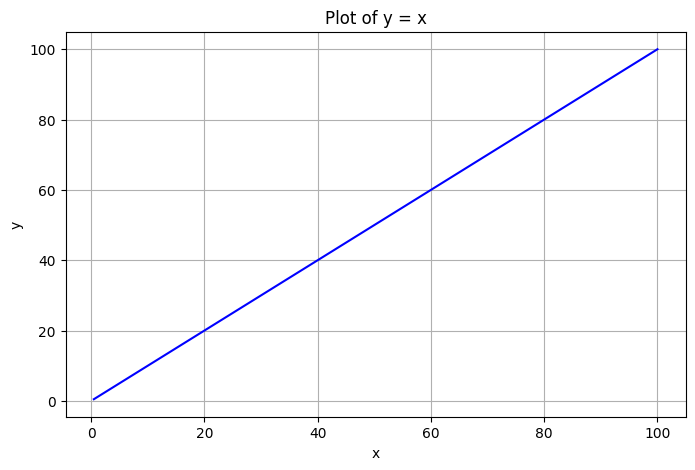

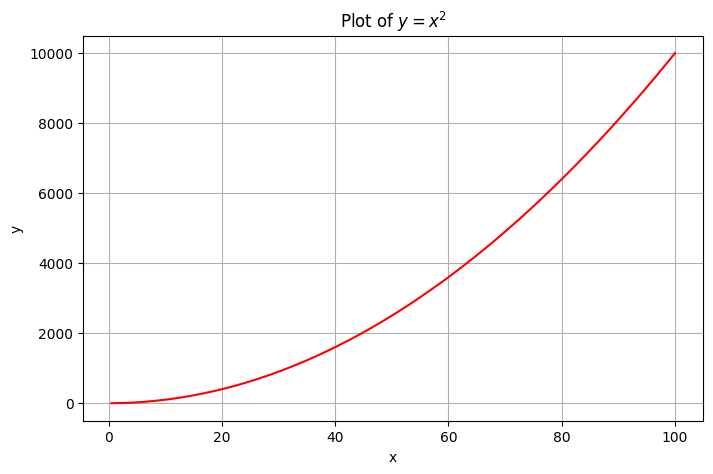

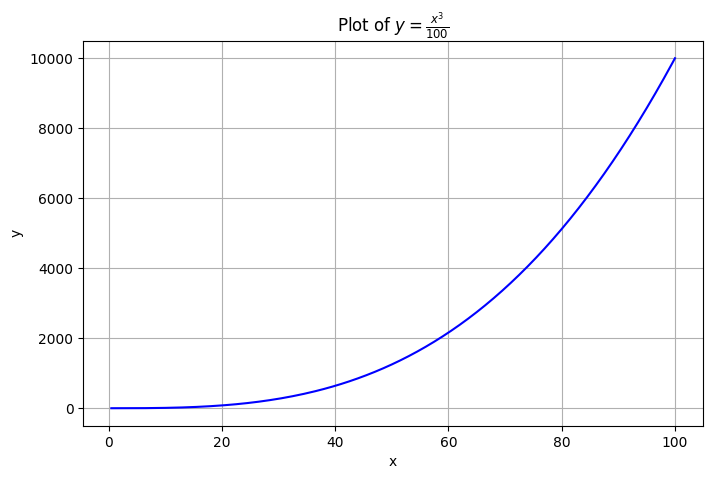

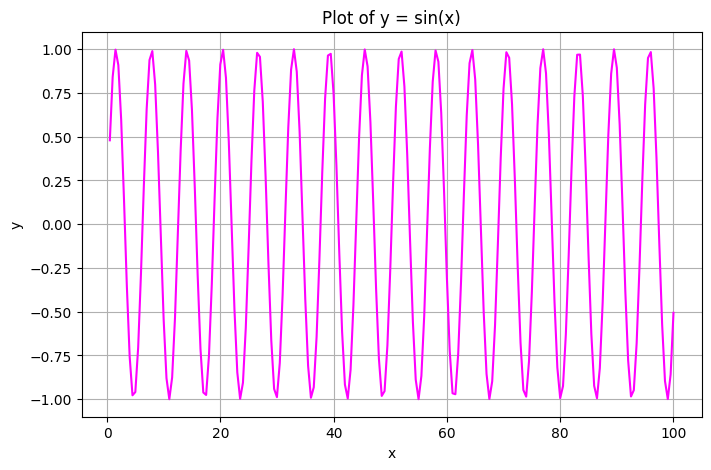

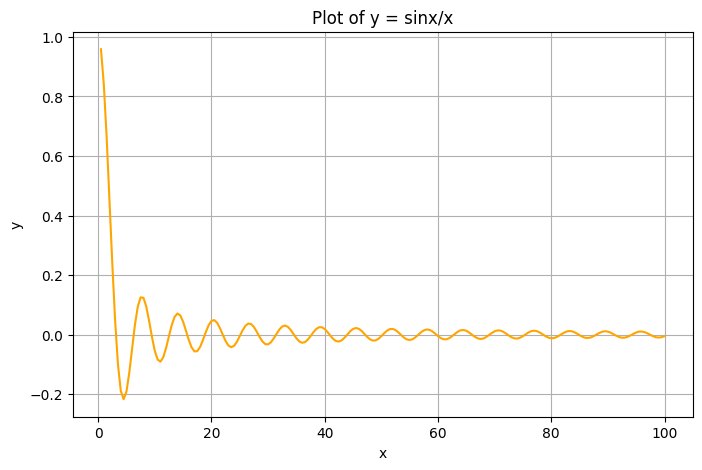

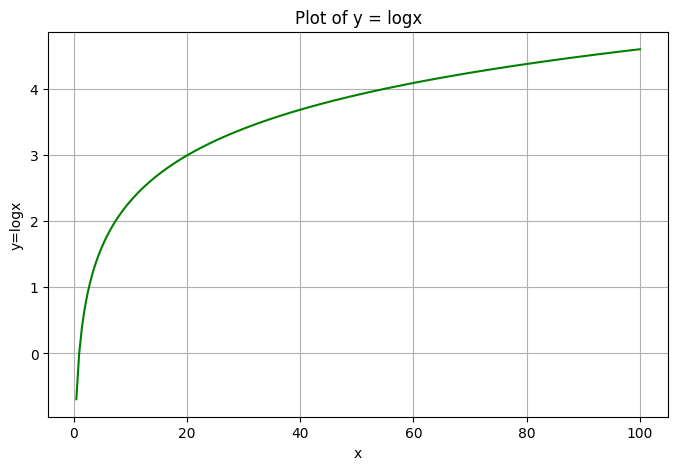

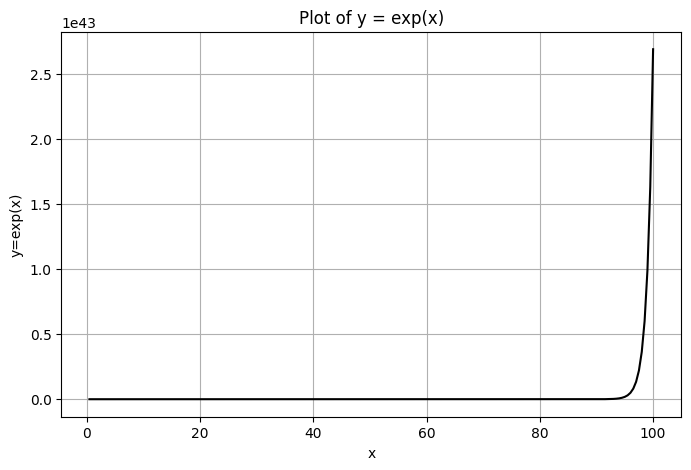

In [26]:
import matplotlib.pyplot as plt
# 1) y=x

x = np.arange(0.5, 100.5, 0.5)
y = x  # y = x


plt.figure(figsize=(8, 5))
plt.plot(x, y, label='y = x', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x')
plt.grid(True)
plt.show()


# 2) y=x**2

x = np.arange(0.5, 100.5, 0.5)
y = x**2


plt.figure(figsize=(8, 5))
plt.plot(x, y, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Plot of $y = x^2$')
plt.grid(True)
plt.show()


# 3) y=x**3/100

x = np.arange(0.5, 100.5, 0.5)
y = x**3/100


plt.figure(figsize=(8, 5))
plt.plot(x, y, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Plot of $y = \frac{x^3}{100}$')
plt.grid(True)
plt.show()


# 4) y=sinx

x = np.arange(0.5, 100.5, 0.5)
y = np.sin(x)


plt.figure(figsize=(8, 5))
plt.plot(x, y, color='magenta')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = sin(x)')
plt.grid(True)
plt.show()


# 5) y=sinx/x

x = np.arange(0.5, 100.5, 0.5)
y = np.sin(x)/x


plt.figure(figsize=(8, 5))
plt.plot(x, y, color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = sinx/x')
plt.grid(True)
plt.show()


# 6) y=logx

x = np.arange(0.5, 100.5, 0.5)
y = np.log(x)


plt.figure(figsize=(8, 5))
plt.plot(x, y,  color='green')
plt.xlabel('x')
plt.ylabel('y=logx')
plt.title('Plot of y = logx')
plt.grid(True)
plt.show()


# 7) y=e^x

x = np.arange(0.5, 100.5, 0.5)
y = np.exp(x)


plt.figure(figsize=(8, 5))
plt.plot(x, y,  color='black')
plt.xlabel('x')
plt.ylabel('y=exp(x)')
plt.title('Plot of y = exp(x)')
plt.grid(True)
plt.show()


Ques-10 Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [2]:
import numpy as np
matrix=np.random.uniform(1,2,size=(20,5))


In [7]:
import pandas as pd

# print(matrix)

dataframe=pd.DataFrame(matrix,columns=['a','b','c','d','e'])
highest_SD = dataframe.std(axis=0).idxmax()

print(dataframe)
print('column with the highest standard deviation:', highest_SD)

lowest_mean=dataframe.mean(axis=1).idxmin()
print('row with the lowest mean:', lowest_mean)

           a         b         c         d         e
0   1.288959  1.824671  1.751270  1.324744  1.904439
1   1.492538  1.452835  1.928387  1.645192  1.602499
2   1.553964  1.196698  1.733584  1.627325  1.237113
3   1.548934  1.024056  1.589237  1.660741  1.069538
4   1.720583  1.851865  1.479614  1.576601  1.311762
5   1.755507  1.665160  1.506126  1.226138  1.948478
6   1.080172  1.589302  1.073239  1.235655  1.933006
7   1.910805  1.763200  1.337898  1.599987  1.760877
8   1.819613  1.833063  1.487684  1.808037  1.207555
9   1.016323  1.708079  1.471832  1.387977  1.509967
10  1.483162  1.955971  1.890067  1.139943  1.223126
11  1.131782  1.776297  1.955888  1.933798  1.976471
12  1.009926  1.378367  1.433496  1.743329  1.072687
13  1.677970  1.494751  1.345774  1.793581  1.469722
14  1.701334  1.403111  1.597816  1.163841  1.293515
15  1.727802  1.210778  1.243145  1.204703  1.825190
16  1.011270  1.398544  1.034540  1.011957  1.717014
17  1.658714  1.586382  1.490815  1.045462  1.

Ques-11 Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [9]:
dataframe['f'] = dataframe[['a','b','c','d','e']].sum(axis=1)

dataframe['g'] = np.where(dataframe['f']<8,'LT8','LT9')

num_LT8 = (dataframe["g"] == "LT8").sum()
std_LT8 = dataframe.loc[dataframe["g"] == "LT8", "f"].std()
std_GT8 = dataframe.loc[dataframe["g"] == "GT8", "f"].std()

print(dataframe)
print("rows where g == 'LT8':", num_LT8)
print("Standard deviation of 'f' (LT8):", std_LT8)
print("Standard deviation of 'f' (GT8):", std_GT8)


           a         b         c         d         e         f    g
0   1.288959  1.824671  1.751270  1.324744  1.904439  8.094083  LT9
1   1.492538  1.452835  1.928387  1.645192  1.602499  8.121450  LT9
2   1.553964  1.196698  1.733584  1.627325  1.237113  7.348684  LT8
3   1.548934  1.024056  1.589237  1.660741  1.069538  6.892506  LT8
4   1.720583  1.851865  1.479614  1.576601  1.311762  7.940425  LT8
5   1.755507  1.665160  1.506126  1.226138  1.948478  8.101409  LT9
6   1.080172  1.589302  1.073239  1.235655  1.933006  6.911373  LT8
7   1.910805  1.763200  1.337898  1.599987  1.760877  8.372767  LT9
8   1.819613  1.833063  1.487684  1.808037  1.207555  8.155952  LT9
9   1.016323  1.708079  1.471832  1.387977  1.509967  7.094179  LT8
10  1.483162  1.955971  1.890067  1.139943  1.223126  7.692269  LT8
11  1.131782  1.776297  1.955888  1.933798  1.976471  8.774237  LT9
12  1.009926  1.378367  1.433496  1.743329  1.072687  6.637804  LT8
13  1.677970  1.494751  1.345774  1.793581  1.46

Ques-12 Write a small piece of code to explain broadcasting in numpy.
\
Answer- Broadcasting in numpy performs arithmetic operations on arrays of different sizes by expanding the small array without copying.



In [10]:
array1=np.array([1,2,3])
array2=np.array([[1,2,3],[4,5,6]])
sum=array1+array2
print('broadcasting example results:',sum)

broadcasting example results: [[2 4 6]
 [5 7 9]]


Ques-13 Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [11]:
import numpy as np

def array(arr: np.ndarray) -> int:
     if arr.size == 0:
        raise ValueError("No elements in the array")

     min_index = 0
     min_value = arr[0]

     for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i

     return min_index

arr1=np.array([1, 2, 3])
arr2=np.array([3, 2, 1])
arr3=np.array([5, 1, 4, 0])
print(array(arr1))
print(array(arr2))
print(array(arr3))


print("NumPy argmin:", np.argmin(arr1))
print("NumPy argmin:", np.argmin(arr2))
print("NumPy argmin:", np.argmin(arr3))


0
2
3
NumPy argmin: 0
NumPy argmin: 2
NumPy argmin: 3
